In [1]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, MultiPolygon
from scipy import sparse
import pandas as pd
import numpy as np
from math import atan2, degrees
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

### This notebook generates the figures forthe base case (San Francisco Bay)

In [2]:
q = sparse.load_npz('Parameters/Bay/pubCharger/q_rec.npz').toarray()[0]
demand_cum = sparse.load_npz(f"Parameters/Bay/pubCharger/demand_cum.npz").toarray()
Location = sparse.load_npz(f"Parameters/Bay/pubCharger/Location.npz").toarray()
N_e_total = len(q)
N_n = 9
N_t = 96

ratio_drivingEV = np.zeros(N_t)
for t in range(N_t):
    ratio_drivingEV[t] = ((Location[:, t] == -1).astype(int) @ q)/q.sum()
ratio_parkingEV = 1 - ratio_drivingEV

In [3]:
ratio_vehicle = np.zeros((N_n+1, N_t))
for t in range(N_t):
    for n in range(N_n):
        ratio_vehicle[n, t] = ((Location[:, t] == n).astype(int) @ q)/q.sum()
    ratio_vehicle[-1, t] = ((Location[:, t] == -1).astype(int) @ q)/q.sum()


index_to_county = {
    0: 'San Francisco',
    1: 'San Mateo',
    2: 'Santa Clara',
    3: 'Alameda',
    4: 'Contra Costa',
    5: 'Solano',
    6: 'Napa',
    7: 'Sonoma',
    8: 'Marin'
}

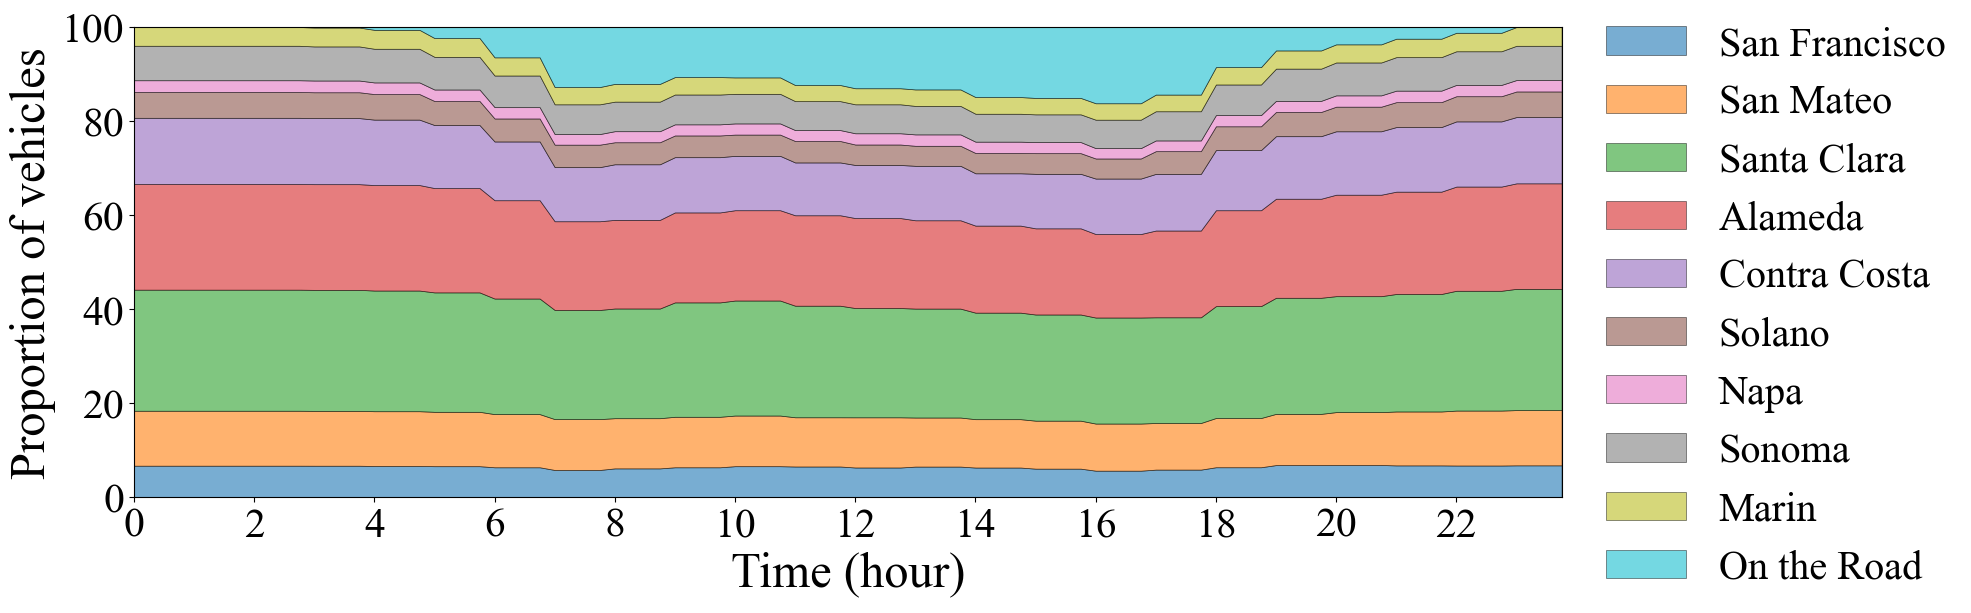

In [4]:
# 获取县名称和添加'On the Road'
labels = [index_to_county[i] for i in range(9)] + ['On the Road']

# 时间轴
time_intervals = list(range(96))

# Nature Energy 风格的配色方案
# 配色方案
colors = [
    '#1f77b4',  # 蓝色
    '#ff7f0e',  # 橙色
    '#2ca02c',  # 绿色
    '#d62728',  # 红色
    '#9467bd',  # 紫色
    '#8c564b',  # 棕色
    '#e377c2',  # 粉色
    '#7f7f7f',  # 灰色
    '#bcbd22',  # 黄绿色
    '#17becf'   # 蓝绿色
]

# colors = [
#     "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
#     "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22",  '#1B9E77' 
# ]

# 绘制面积堆叠图
fig, ax = plt.subplots(figsize=(20, 6.18))
ax.stackplot(time_intervals, ratio_vehicle * 100, labels=labels, colors=colors, alpha = 0.6, edgecolor='black', linewidth=0.5)

# 设置标签和标题
ax.set_xlabel('Time (hour)', fontsize=35)
ax.set_ylabel('Proportion of vehicles', fontsize=35)
# ax.set_title('Ratio of EVs Parking and Driving Over a Day', fontsize=35)
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1.08), fontsize=29, frameon=False)

# 美化 x 轴标签，每隔12个数显示一次，并设置字体大小为 30
ax.set_xticks(range(0, 96, 8))  # 每隔12个15分钟间隔（每3小时）显示一次刻度
ax.set_xticklabels(range(0, 24, 2), fontsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlim(0, 95)
ax.set_ylim(0, 100)

# 显示图形
plt.tight_layout()
# plt.savefig('figures/California/ratio_parking_Bay.pdf', format='pdf', bbox_inches='tight')
plt.show()

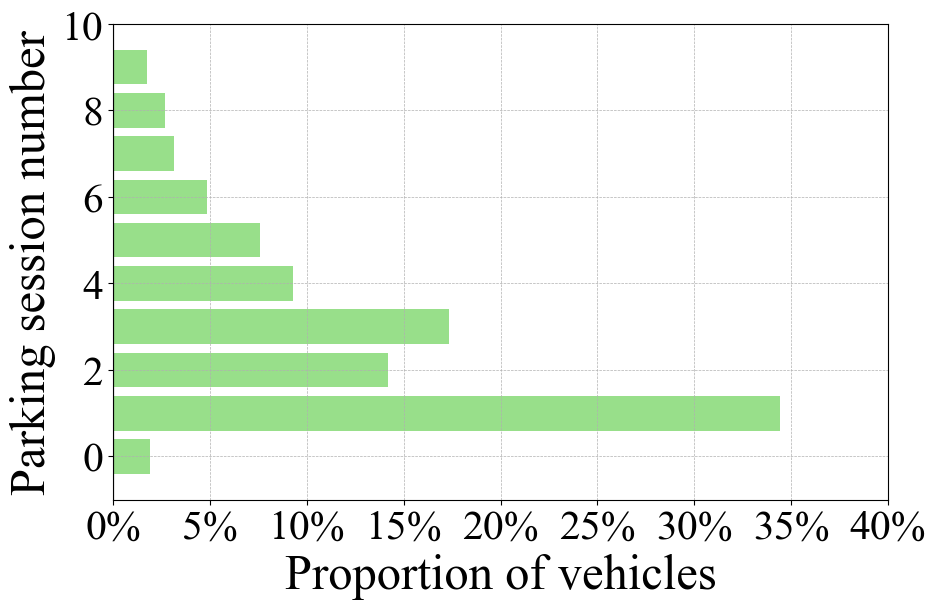

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建图形和轴
df = pd.read_csv('Results_plot/Bay/parkingSession_count.csv', index_col=0)


colors = ['#aec7e8', '#98df8a']
# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6.18))

# 设置X轴范围
max_value = max(df['Home'].max(), df['Non-home'].max())
# ax.set_xlim(-max_value, max_value)
ax.set_xlim(0, 40.0)

# 绘制home数据，颜色为蓝色，向左
# bars_home = ax.barh(df.index, -df['Home'], color='#4c72b0', label='Home')

# 绘制nonhome数据，颜色为绿色，向右
bars_nonhome = ax.barh(df.index, df['Non-home'], color=colors[1], label='Non-home')

# 添加垂直线
ax.axvline(0, color='black', linewidth=0.8)

# 设置标签和标题
ax.set_xlabel('Proportion of vehicles', fontsize=35)
ax.set_ylabel('Parking session number', fontsize=35)
# ax.set_title('Home vs Non-home Comparison', fontsize=16, weight='bold')

# 获取当前的xticks
xticks = ax.get_xticks()

# 设置xticks，使左侧显示为正值并显示为百分数
ax.set_xticks(xticks)
ax.set_xticklabels([f'{abs(x):.0f}%' for x in xticks])
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

ax.set_ylim(-1, 10)
ax.grid(True, axis='both', linestyle='--', linewidth=0.5)

# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# plt.savefig('figures/California/parkSession_count_Bay.pdf', format='pdf', bbox_inches='tight')





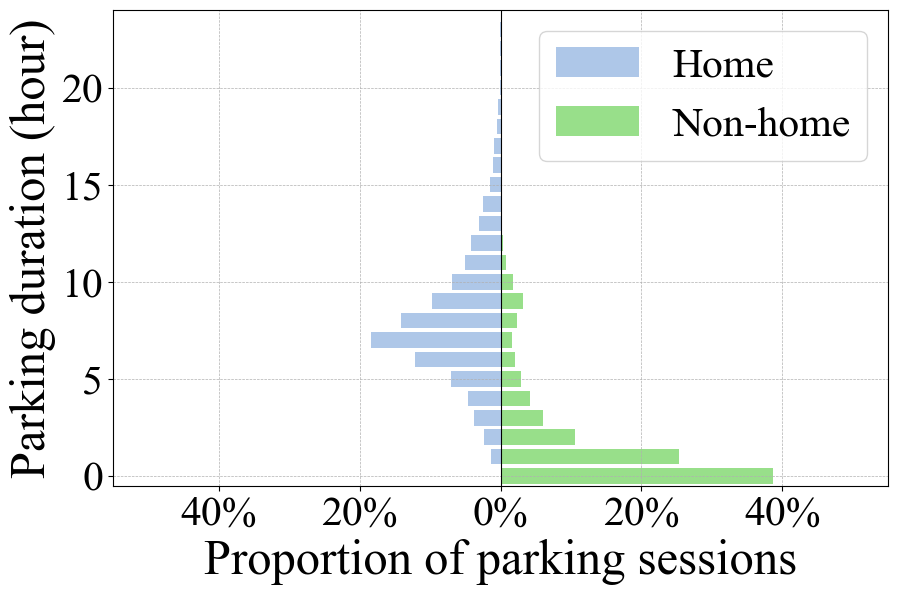

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 创建图形和轴
df = pd.read_csv('Results_plot/Bay/parkingSession_duration.csv', index_col=0)[::4]


# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6.18))

colors = ['#aec7e8', '#98df8a']
# 设置X轴范围
max_value = max(df['Home'].max(), df['Non-home'].max())
ax.set_xlim(-55, 55)
bar_width = 0.8
# 绘制home数据，颜色为蓝色，向左
bars_home = ax.barh(np.arange(24), -df['Home'], color=colors[0], label='Home', height=bar_width)

# 绘制nonhome数据，颜色为绿色，向右
bars_nonhome = ax.barh(np.arange(24), df['Non-home'], color=colors[1], label='Non-home', height=bar_width)

# 添加垂直线
ax.axvline(0, color='black', linewidth=0.8)

# 设置标签和标题
ax.set_xlabel('Proportion of parking sessions', fontsize=35)
ax.set_ylabel('Parking duration (hour)', fontsize=35)
# ax.set_title('Home vs Non-home Comparison', fontsize=16, weight='bold')

# 获取当前的xticks
xticks = ax.get_xticks()

# 设置xticks，使左侧显示为正值并显示为百分数
ax.set_xticks(xticks)
ax.set_xticklabels([f'{abs(x):.0f}%' for x in xticks])
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

# 添加图例
ax.legend(loc='upper right', fontsize='30')
ax.grid(True, axis='both', linestyle='--', linewidth=0.5)
ax.set_ylim(-0.5, 24)
ax.set_xlim(-55, 55)

# 设置字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# plt.savefig('figures/California/parkSession_duration_Bay.pdf', format='pdf', bbox_inches='tight')

# 显示图表
# plt.tight布局()
# plt.show()




In [7]:
capacityNum = 1
capacity_scale = [1.0]
peneList = [0.025]
peneNum = len(peneList)

ratio_pubCharger_list = [0.4]
ratioNum = len(ratio_pubCharger_list)

In [8]:
great_bay_area_counties = [
    'San Francisco',
    'San Mateo',
    'Santa Clara',
    'Alameda',
    'Contra Costa',
    'Solano',
    'Napa',
    'Sonoma',
    'Marin'
]

index_to_county = {
    0: 'San Francisco',
    1: 'San Mateo',
    2: 'Santa Clara',
    3: 'Alameda',
    4: 'Contra Costa',
    5: 'Solano',
    6: 'Napa',
    7: 'Sonoma',
    8: 'Marin'
}

# key代表功率改变点，value第一个数代表注入，value第二个数代表流出
line_to_county = {
    0: (0, 8),
    1: (1, 0),
    2: (2, 1),
    3: (3, 2),
    4: (4, 3),
    5: (5, 4),
    6: (6, 5),
    7: (7, 6),
    8: (8, 7)
}

# key为line index, value第一个数代表流入，value第二个数代表流出
line_twoends = {
    0: (1, 0),
    1: (2, 1),
    2: (3, 2),
    3: (4, 3),
    4: (5, 4),
    5: (6, 5),
    6: (7, 6),
    7: (8, 7),
    8: (0, 8),
}


In [9]:
# 读取 Shapefile
shapefile_path = "geo_California/tl_2023_us_county/tl_2023_us_county.shp"
counties = gpd.read_file(shapefile_path)

# 定义湾区9个县的名称
bay_area_counties_names = [
    'San Francisco', 'San Mateo', 'Santa Clara', 'Alameda',
    'Contra Costa', 'Solano', 'Napa', 'Sonoma', 'Marin'
]

# 过滤出湾区9个县的数据
bay_area_counties = counties[counties['NAME'].isin(bay_area_counties_names)]

In [10]:
N_line = 9
N_n = 9
line_twoends_name = {}
for n in range(N_line):
    line_twoends_name[n] = (index_to_county[line_twoends[n][0]], index_to_county[line_twoends[n][1]])

In [11]:
# filePath = 'Results/Chicago2017_RealCapacity/VB_VL_realPene'


u_UB_rec = {}
u_LB_rec = {}
E_UB_rec = {}
E_LB_rec = {}
f_UB_rec = {}
f_LB_rec = {}

for i in [0]:
    u_UB_rec[i] = {}
    u_LB_rec[i] = {}
    E_UB_rec[i] = {}
    E_LB_rec[i] = {}
    f_UB_rec[i] = {}
    f_LB_rec[i] = {}
    pene_value = peneList[i]
    path_temp = f'Results/Bay/VB_VL_realPene/pene={pene_value:.3f}_new'
    for ratio_pubCharger in ratio_pubCharger_list:
        u_UB_rec[i][ratio_pubCharger] = {}
        u_LB_rec[i][ratio_pubCharger] = {}
        E_UB_rec[i][ratio_pubCharger] = {}
        E_LB_rec[i][ratio_pubCharger] = {}
        f_UB_rec[i][ratio_pubCharger] = {}
        f_LB_rec[i][ratio_pubCharger] = {}
        for j in range(capacityNum):
            u_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/u_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            u_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/u_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            E_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/E_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            E_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/E_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            f_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/f_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            f_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/f_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()

            break # only one capacity scale
        break # only one ratio_pubCharger
    break # only one pene_value

            
            
            
            

In [12]:
data_plot = {
    'u_UB': u_UB_rec[i][ratio_pubCharger][j],
    'u_LB': u_LB_rec[i][ratio_pubCharger][j],
    'E_UB': E_UB_rec[i][ratio_pubCharger][j],
    'E_LB': E_LB_rec[i][ratio_pubCharger][j],
    'f_UB': f_UB_rec[i][ratio_pubCharger][j],
    'f_LB': f_LB_rec[i][ratio_pubCharger][j],
}

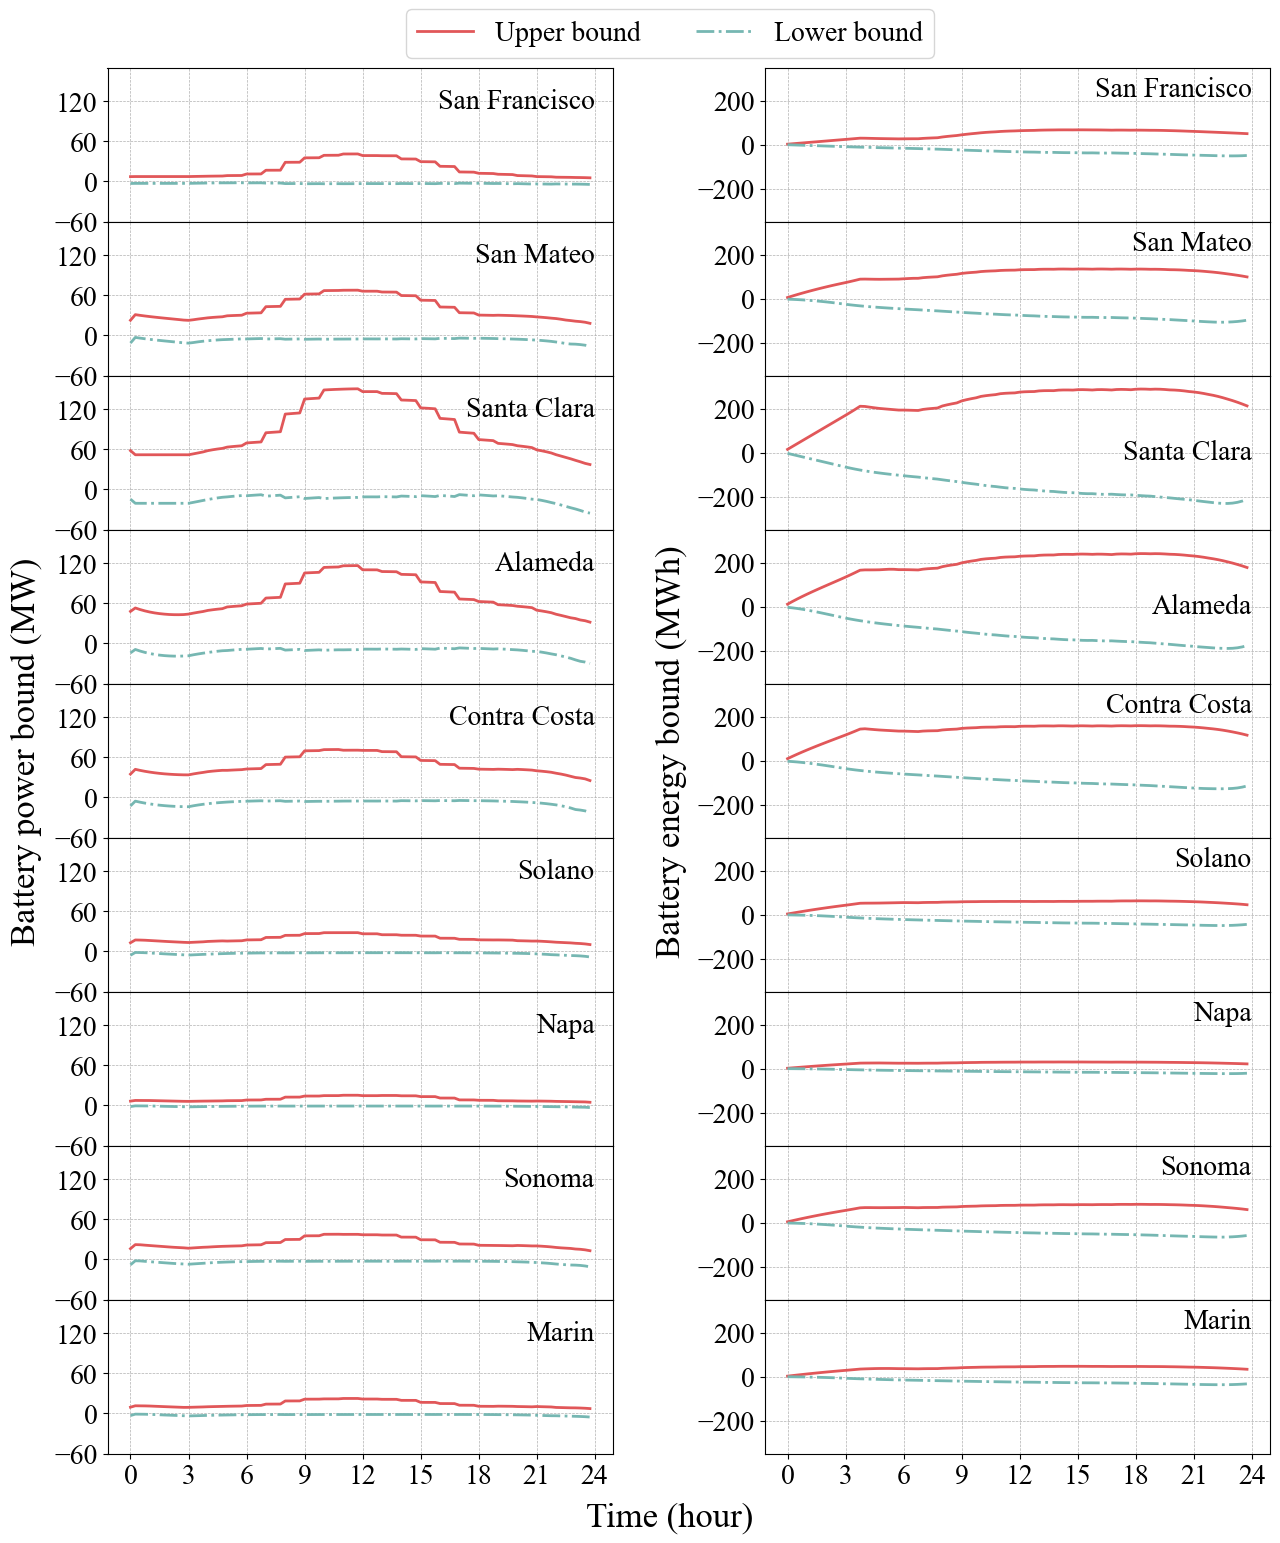

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 生成示例数据

fig, axs = plt.subplots(N_n, 2, figsize=(15, 18), sharex=True, sharey=False)
colors = ['#E15759', '#76B7B2', '#59A14F', '#EDC948']
linestyles = ['-', '-.']  # 实线和虚线

x_axis = np.arange(96)/4
for i in range(N_n):
    axs[i, 0].set_ylim(-60, 170)
    l1, = axs[i, 0].plot(x_axis, data_plot['u_UB'][i], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
    l2, = axs[i, 0].plot(x_axis, data_plot['u_LB'][i], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
    # axs[i, 0].legend(loc='upper right')
    axs[i, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=20)
    axs[i, 0].text(24, 120, f'{index_to_county[i]}', fontsize=20, ha='right', va='center')  # 添加文字
    axs[i, 0].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
    axs[i, 0].set_yticks(np.arange(-60, 180, 60))  # 设置y轴刻度间隔


    axs[i, 1].set_ylim(-350, 350)
    axs[i, 1].plot(x_axis, data_plot['E_UB'][i], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
    axs[i, 1].plot(x_axis, data_plot['E_LB'][i], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
    # axs[i, 1].legend(loc='upper right')
    axs[i, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=20)
    if index_to_county[i] in ['Alameda', 'Santa Clara']:
        axs[i, 1].text(24, 0, f'{index_to_county[i]}', fontsize=20, ha='right', va='center')  # 添加文字
    else:
        axs[i, 1].text(24, 250, f'{index_to_county[i]}', fontsize=20, ha='right', va='center')

    axs[i, 1].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
    axs[i, 1].set_yticks(np.arange(-200, 400, 200))  # 设置y轴刻度间隔
    # axs[i, 2].plot(x_axis, data_plot['f_UB'][i], label='Series 1')
    # axs[i, 2].plot(x_axis, data_plot['f_LB'][i], label='Series 2')
    # axs[i, 2].legend(loc='upper right')
    # axs[i, 2].grid(True)

# 调整子图之间的间距
fig.subplots_adjust(hspace=0, wspace=0.3)

# 共享x轴标签和y轴标签
fig.text(0.5, 0.07, 'Time (hour)', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'Battery power bound (MW)', va='center', rotation='vertical', fontsize=25)
fig.text(0.49, 0.5, 'Battery energy bound (MWh)', va='center', rotation='vertical', fontsize=25)
fig.legend([l1, l2], ['Upper bound', 'Lower bound'], loc='upper center', bbox_to_anchor=(0.5, 0.92), ncol=2, fontsize=20)

# plt.savefig('figures/California/batteryCapacity_Bay.pdf', format='pdf', bbox_inches='tight')
plt.show()


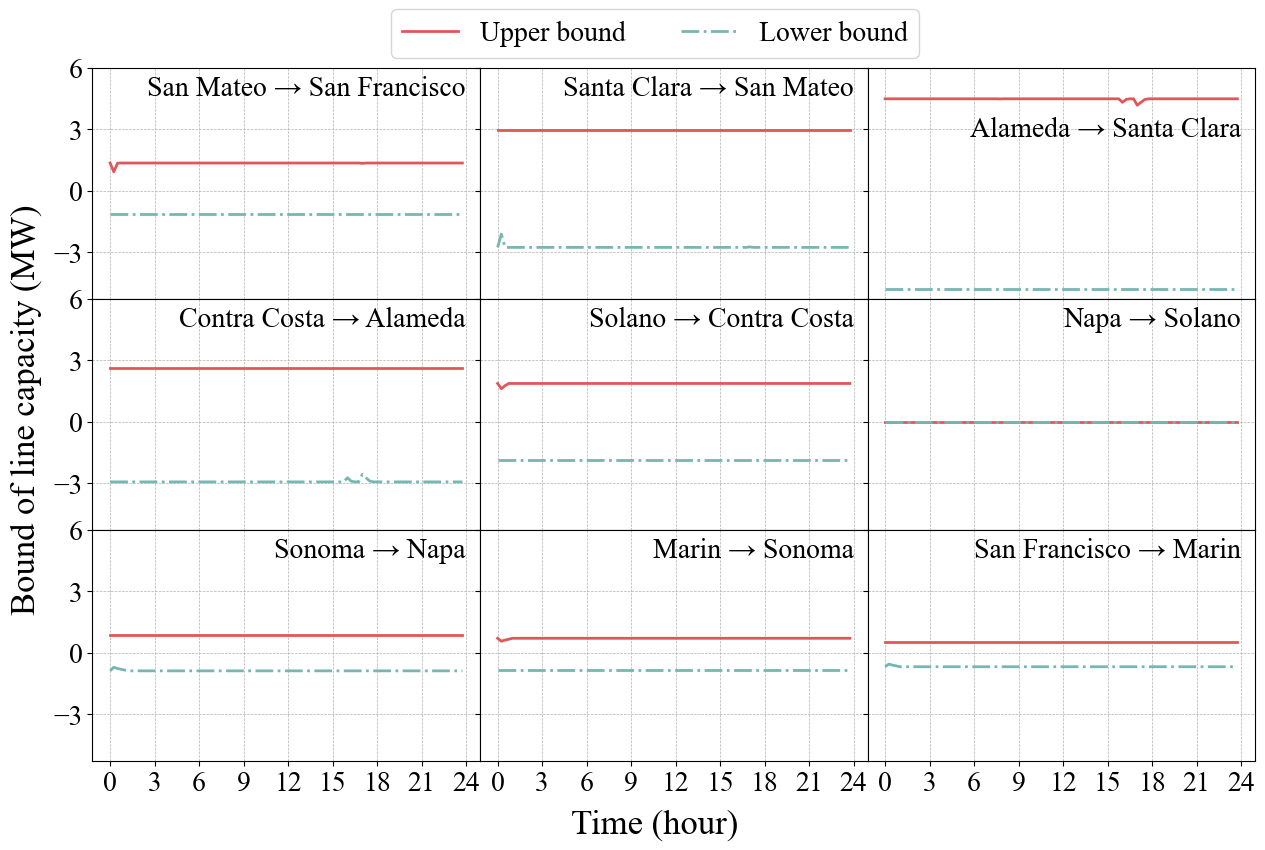

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 生成示例数据

fig, axs = plt.subplots(3, 3, figsize=(15, 9), sharex=True, sharey=True)
colors = ['#E15759', '#76B7B2', '#59A14F', '#EDC948']
linestyles = ['-', '-.']  # 实线和虚线

x_axis = np.arange(96)/4
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        # axs[i, 0].set_ylim(-40, 70)
        l1, = axs[i, j].plot(x_axis, data_plot['f_UB'][index], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
        l2, = axs[i, j].plot(x_axis, data_plot['f_LB'][index], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
        # axs[i, 0].legend(loc='upper right')
        axs[i, j].grid(True, which='both', linestyle='--', linewidth=0.5)
        axs[i, j].tick_params(axis='both', which='major', labelsize=20)
        if line_twoends_name[index] in [('Alameda', 'Santa Clara')]:
            axs[i, j].text(24, 3, f'{line_twoends_name[index][0]} → {line_twoends_name[index][1]}', fontsize=20, ha='right', va='center')
        else:
            axs[i, j].text(24, 5, f'{line_twoends_name[index][0]} → {line_twoends_name[index][1]}', fontsize=20, ha='right', va='center')  # 添加文字
        axs[i, j].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
        axs[i, j].set_yticks(np.arange(-3, 7, 3))  # 设置y轴刻度间隔

fig.subplots_adjust(hspace=0, wspace=0)
# 共享x轴标签和y轴标签
fig.text(0.5, 0.03, 'Time (hour)', ha='center', fontsize=25)
fig.text(0.07, 0.5, 'Bound of line capacity (MW)', va='center', rotation='vertical', fontsize=25)
fig.legend([l1, l2], ['Upper bound', 'Lower bound'], loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=2, fontsize=20)

# plt.savefig('figures/California/lineCapacity_Bay_new.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [15]:
# 读取GeoJSON文件

# countyIndices = [31, 43, 89, 97, 111, 197, 93]

# order is correct


def flexibilityValue(u_UB_plot, u_LB_plot, E_UB_plot, E_LB_plot, f_UB_plot, f_LB_plot):
    batteryEnergyCapacity = E_UB_plot - E_LB_plot
    lineCapacity = f_UB_plot - f_LB_plot
    circleSize = {}
    circleSize_power = {}
    for n in range(N_n):
        county = index_to_county[n]
        circleSize[county] = batteryEnergyCapacity[n]
        circleSize_power[county] = u_UB_plot[n] - u_LB_plot[n]

    lineWidth = {}
    for l in range(N_line):
        line = line_twoends_name[l]
        lineWidth[line] = lineCapacity[l]

    batteryPowerPrint = {}
    batteryEnergyPrint = {}
    for n in range(N_n):
        county = index_to_county[n]
        batteryPowerPrint[county] = f"{u_LB_plot[n]*1000:.1f} MW &le; u &le; {u_UB_plot[n]*1000:.1f} MW"
        batteryEnergyPrint[county] = f"{E_LB_plot[n]*1000:.1f} MWh &le; E &le; {E_UB_plot[n]*1000:.1f} MWh"

    linePowerPrint = {}
    for l in range(N_line):
        line = line_twoends_name[l]
        linePowerPrint[line] = f"{f_LB_plot[l]*1000:.1f} MW &le; f &le; {f_UB_plot[l]*1000:.1f} MW"

    return circleSize, circleSize_power, lineWidth, batteryPowerPrint, batteryEnergyPrint, linePowerPrint


In [16]:
i = 0
j = 0
r = 0
ratio_pubCharger = ratio_pubCharger_list[r]

u_UB_plot = u_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
u_LB_plot = u_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
E_UB_plot = E_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GWh
E_LB_plot = E_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GWh
f_UB_plot = f_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
f_LB_plot = f_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW

circleSize, circleSize_power, lineWidth, batteryPowerPrint, batteryEnergyPrint, linePowerPrint = flexibilityValue(
    u_UB_plot, u_LB_plot, E_UB_plot, E_LB_plot, f_UB_plot, f_LB_plot)

In [17]:
import math

move = {
    'San Francisco': 0,
    'San Mateo': 0,
    'Santa Clara': 0,
    'Alameda': 0,
    'Contra Costa': 0,
    'Solano': 0,
    'Napa': 0,
    'Sonoma': 0,
    'Marin': 0,
    }


def calculate_offset_location(midpoint, angle, offset_distance=10):
    angle_rad = math.radians(angle)
    # Offset direction is perpendicular to the line
    offset_x = midpoint[0] - offset_distance * math.cos(angle_rad)
    offset_y = midpoint[1] - offset_distance * math.sin(angle_rad)
    return [offset_x, offset_y]

In [18]:
midpoint_rec = {
    ('San Mateo', 'San Francisco'): [37.77, -122.45],
    ('Santa Clara', 'San Mateo'): [37.35, -122.28972355868166],
    ('Alameda', 'Santa Clara'): [37.274286875607515, -121.6],
    ('Contra Costa', 'Alameda'): [37.65, -121.95],
    ('Solano', 'Contra Costa'): [37.9, -121.9],
    ('Sonoma', 'Napa'): [38.55, -122.8],
    ('Marin', 'Sonoma'): [38.47836203467226, -122.85],
    ('San Francisco', 'Marin'): [38.02564046815022, -122.74337192213099],
    ('Napa', 'Solano'): [38.55, -122.25],
    }

In [19]:
# 配色方案
# Nature-inspired color scheme
# circle_color = '#7FC8A9'  # Deep Teal
circle_color = 'grey'  # Deep Teal
line_color = '#5F7A61'  # Deep Red
boundary_color = 'grey'  # Charcoal Gray
fill_color = '#d3e5d6'

midpoint_rec = {
    ('San Mateo', 'San Francisco'): [37.77, -122.45],
    ('Santa Clara', 'San Mateo'): [37.35, -122.28972355868166],
    ('Alameda', 'Santa Clara'): [37.274286875607515, -121.6],
    ('Contra Costa', 'Alameda'): [37.65, -121.95],
    ('Solano', 'Contra Costa'): [37.9, -121.9],
    ('Sonoma', 'Napa'): [38.55, -122.8],
    ('Marin', 'Sonoma'): [38.47836203467226, -122.85],
    ('San Francisco', 'Marin'): [38.02564046815022, -122.74337192213099],
    ('Napa', 'Solano'): [38.55, -122.25],
    }
angle_rec = {
    ('San Mateo', 'San Francisco'): 68,
    ('Santa Clara', 'San Mateo'): 19.169007694302262,
    ('Alameda', 'Santa Clara'): -115.94600904192123,
    ('Contra Costa', 'Alameda'): -96.89314206288577,
    ('Solano', 'Contra Costa'): -88.15844951083328,
    ('Sonoma', 'Napa'): 1,
    ('Marin', 'Sonoma'): 71,
    ('San Francisco', 'Marin'): 59,
    ('Napa', 'Solano'): 35,
 }


# 创建Folium地图
m = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

# 添加一个透明度为50%的TileLayer
folium.TileLayer('CartoDB Positron', opacity=0.8).add_to(m)

# 添加县的GeoJSON数据和time_flexibility圆点
county_centers = {}
# 遍历 GeoDataFrame 中的行
for _, row in bay_area_counties.iterrows():
    county = row['NAME']
    if county == 'San Francisco':
        county_center = (row['geometry'].centroid.x+0.2, row['geometry'].centroid.y)
    else:
        county_center = (row['geometry'].centroid.x, row['geometry'].centroid.y)
    value = circleSize_power.get(county, 1.0)  # 确保从字典中获取值
    
    # 获取几何图形
    geom = row['geometry']
    county_centers[county] = county_center
    
    # 处理 Polygon 类型的几何图形
    if isinstance(geom, Polygon):
        coords = [(y, x) for x, y in geom.exterior.coords]
        folium.Polygon(
            locations=coords,
            color=boundary_color,
            weight=0.5,
            fillColor=fill_color,
            fill_opacity=0.5,
        ).add_to(m)
    
    # 处理 MultiPolygon 类型的几何图形
    elif isinstance(geom, MultiPolygon):
        for polygon in geom.geoms:
            coords = [(y, x) for x, y in polygon.exterior.coords]
            folium.Polygon(
                locations=coords,
                color=boundary_color,
                weight=0.5,
                fillColor=fill_color,
                fill_opacity=0.5,
            ).add_to(m)

    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=500,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_color,
        fill=True,
        fill_color=circle_color,
        fill_opacity=1,
        tooltip=f"{county}: {value:.2f}"
    ).add_to(m)


    # # 添加县名标签
    # folium.Marker(
    #     location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
    #     icon=folium.DivIcon(
    #         html=f"""<div class="label1" style="font-size: 12pt; color: #808080; white-space: nowrap;font-family: 'Times New Roman', Times, serif;">{county}</div>"""
    #     )
    # ).add_to(m)

# 添加代表space_flexibility的线条
for (county1, county2), value in lineWidth.items():
    county1_center = county_centers[county1]
    county2_center = county_centers[county2]

    if value > 0:

        if value >= 1e-3:
            folium.PolyLine(
                locations=[[county1_center[1], county1_center[0]], [county2_center[1], county2_center[0]]],  # folium使用[lat, lon]
                color=line_color,
                opacity=0.7,
                weight=value * 2000,  # 线条宽度根据space_flexibility调整
                tooltip=f"{county1} to {county2}: {value:.2f}"
            ).add_to(m)

        # else:
        #     folium.PolyLine(
        #         locations=[[county1_center[1], county1_center[0]], [county2_center[1], county2_center[0]]],  # folium使用[lat, lon]
        #         color=line_color,
        #         opacity=0.7,
        #         weight=1e-3 * 2000,  # 线条宽度根据space_flexibility调整
        #         tooltip=f"{county1} to {county2}: {value:.2f}"
        #     ).add_to(m)


        # 计算线条中点坐标
        # tt = 0.1
        # midpoint = [(county1_center[1] * tt + county2_center[1] * (1-tt)), (county1_center[0] * tt + county2_center[0] * (1-tt))]
        # midpoint_rec[(county1, county2)] = midpoint
        
        # 计算旋转角度
            angle = angle_rec[(county1, county2)]
            # angle = angle_test[(county1, county2)]
            # print ((county1, county2), angle)

            # offset_location = calculate_offset_location(midpoint_rec[(county1, county2)], angle, 0.03)
            # if county2 == 'Will':
            #     offset_location = calculate_offset_location(midpoint, angle, 0.05)


            # 添加线条标签并使其平行于线条且居中对齐
            folium.map.Marker(
                location=midpoint_rec[(county1, county2)],
                icon=folium.DivIcon(
                    html=f"""<div class="label2" style="font-size: 15pt; color: #4E6350; white-space: nowrap; font-family: 'Times New Roman', Times, serif; transform: translate(-50%, -48%) rotate({angle}deg); transform-origin: center; padding: 100px;">{linePowerPrint[(county1, county2)]}</div>"""
                )
            ).add_to(m)
# m.save(f'figure_html/Bay/virtual_lines_map_real.html')
m

In [20]:
# 配色方案
# Nature-inspired color scheme
circle_color = '#7FC8A9'  # Deep Teal
circle_power_color = '#a68a64'  # Deep Teal
boundary_color = 'grey'  # Charcoal Gray
fill_color = '#d3e5d6'

# countyNamePosition = {'Cook': [41.7, -87.7],
#                       'DuPage': [41.95, -88.1],
#                       'Kane': [41.85, -88.5],
#                       'Lake': [42.25, -87.9],
#                       'McHenry': [42.25, -88.6],
#                       'Will': [41.57, -87.97867926995366],
#                       'Kendall': [41.67, -88.5]}

batteryPrintPosition = {
    'Sonoma': (-123.15, 38.6),
    'San Francisco': (-122.7, 37.8),
    'Marin': (-122.9, 38.1),
    'Napa': (-122.4, 38.55),
    'Solano': (-122.1, 38.32),
    'Contra Costa': (-122.15, 38.02),
    'Santa Clara': (-121.9, 37.0),
    'Alameda': (-122.1, 37.45),
    'San Mateo': (-122.6, 37.3)
 }

# 创建Folium地图
m_battery = folium.Map(location=[37.7749, -122.4194], zoom_start=10)

# 添加一个透明度为80%的TileLayer
folium.TileLayer('CartoDB Positron', opacity=0.8).add_to(m_battery)

# 添加县的GeoJSON数据和time_flexibility圆点
county_centers = {}
# 遍历 GeoDataFrame 中的行
for _, row in bay_area_counties.iterrows():
    county = row['NAME']
    if county == 'San Francisco':
        county_center = (row['geometry'].centroid.x+0.2, row['geometry'].centroid.y)
    else:
        county_center = (row['geometry'].centroid.x, row['geometry'].centroid.y)
    value = circleSize_power.get(county, 1.0)  # 确保从字典中获取值
    
    # 获取几何图形
    geom = row['geometry']
    county_centers[county] = county_center
    
    value_energy = circleSize[county]
    value_power = circleSize_power[county]
    # 处理 Polygon 类型的几何图形
    if isinstance(geom, Polygon):
        coords = [(y, x) for x, y in geom.exterior.coords]
        folium.Polygon(
            locations=coords,
            color=boundary_color,
            weight=0.4,
            fillColor=fill_color,
            fill_opacity=0.5,
        ).add_to(m_battery)
    
    # 处理 MultiPolygon 类型的几何图形
    elif isinstance(geom, MultiPolygon):
        for polygon in geom.geoms:
            coords = [(y, x) for x, y in polygon.exterior.coords]
            folium.Polygon(
                locations=coords,
                color=boundary_color,
                weight=0.4,
                fillColor=fill_color,
                fill_opacity=0.5,
            ).add_to(m_battery)

    radius_energy = value_energy * 40000
    radius_power = value_power * 100000
    midpoint_distance = 0.5 * (radius_energy + radius_power)/1e5
    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=radius_energy,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_color,
        opacity=0.9,
        fill=True,
        fill_color=circle_color,
        fill_opacity=0.3,
        tooltip=f"{county}: {value_energy:.2f}"
    ).add_to(m_battery)

    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=radius_power,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_power_color,
        opacity=0.5,
        fill=True,
        fill_color=circle_power_color,
        fill_opacity=0.3,
        tooltip=f"{county}: {value_power:.2f}"
    ).add_to(m_battery)

    # 添加县名标签
    # folium.Marker(
    #     [county_center[1], county_center[0]],  # folium使用[lat, lon]
    #     icon=folium.DivIcon(
    #         html=f"""<div class="label1" style="font-size: 12pt; color: grey; white-space: nowrap;font-family: 'Times New Roman', Times, serif;">{county}</div>"""
    #     )
    # ).add_to(m_battery)
    
    # 添加圆点标签
    folium.map.Marker(
        location=[batteryPrintPosition[county][1], batteryPrintPosition[county][0]],
        icon=folium.DivIcon(
            html=f"""<div class="label3" style="font-size: 15pt; color : #a98467; white-space: nowrap; font-family: 'Times New Roman', Times, serif;text-align: center; transform: translate(-50%, -50%);">{batteryPowerPrint[county]}</div>"""
        )
    ).add_to(m_battery)

    folium.map.Marker(
        location=[batteryPrintPosition[county][1]+0.04,batteryPrintPosition[county][0]],
        icon=folium.DivIcon(
            html=f"""<div class="label4" style="font-size: 15pt; color : #4c956c; white-space: nowrap; font-family: 'Times New Roman', Times, serif;text-align: center; transform: translate(-50%, -50%);">{batteryEnergyPrint[county]}</div>"""
        )
    ).add_to(m_battery)


# 添加表示图例的圆圈位置
legend_location = [37.1, -122.8194]  # 图例的中心位置，可以根据需要调整

# 添加白框背景
folium.Rectangle(
    bounds=[[legend_location[0] - 0.1, legend_location[1] - 0.2], 
            [legend_location[0] + 0.1, legend_location[1] + 0.2]],
    color='white',
    fill=True,
    fill_color='white',
    fill_opacity=0.8
).add_to(m_battery)

# 添加Energy Circle图例
folium.Circle(
    location=[legend_location[0] - 0.05, legend_location[1]-0.15],  # 图例圆圈的位置
    radius=0.1 * 20000,  # value_energy=1000时的圆圈半径
    color=circle_color,
    opacity=0.9,
    fill=True,
    fill_color=circle_color,
    fill_opacity=0.3
).add_to(m_battery)

# 添加Power Circle图例
folium.Circle(
    location=[legend_location[0] + 0.05, legend_location[1]-0.15],  # 图例圆圈的位置
    radius=0.1 * 20000,  # value_power=10000时的圆圈半径
    color=circle_power_color,
    opacity=0.5,
    fill=True,
    fill_color=circle_power_color,
    fill_opacity=0.3
).add_to(m_battery)

# 添加文字说明在圆的右方
folium.Marker(
    location=[legend_location[0] - 0.03, legend_location[1] -0.08],  # 文字位置，调整使其在圆的右方
    icon=folium.DivIcon(
        html='<div style="font-size: 15pt; font-family: \'Times New Roman\', Times, serif; color: black; padding: 2px; white-space: nowrap;">E=50 MWh</div>'
    )
).add_to(m_battery)

folium.Marker(
    location=[legend_location[0] + 0.07, legend_location[1] -0.08],  # 文字位置，调整使其在圆的右方
    icon=folium.DivIcon(
        html='<div style="font-size: 15pt; font-family: \'Times New Roman\', Times, serif; color: black; padding: 2px; white-space: nowrap; ">P=20 MW</div>'
    )
).add_to(m_battery)


# # 保存地图
# m_battery.save(f'figure_html/Bay/battery_map_bay.html')
m_battery

In [21]:
home_parkingHours_bay = pd.read_csv('geo_California/home_parkingHours_bay.csv', index_col = 0)
nonhome_parkingHours_bay = pd.read_csv('geo_California/nonhome_parkingHours_bay.csv', index_col = 0)
df = pd.merge(home_parkingHours_bay, nonhome_parkingHours_bay, on='County')
df['home_pct'] = df['Home Parking Hours'] / df['Home Parking Hours'].sum() * 100
df['nonhome_pct'] = df['Nonhome Parking Hours'] / df['Nonhome Parking Hours'].sum() * 100
df['totalParkHours'] = df['Home Parking Hours'] + df['Nonhome Parking Hours']
labelNames = df['County'].values
labelNames[3] = 'Contra\nCosta'

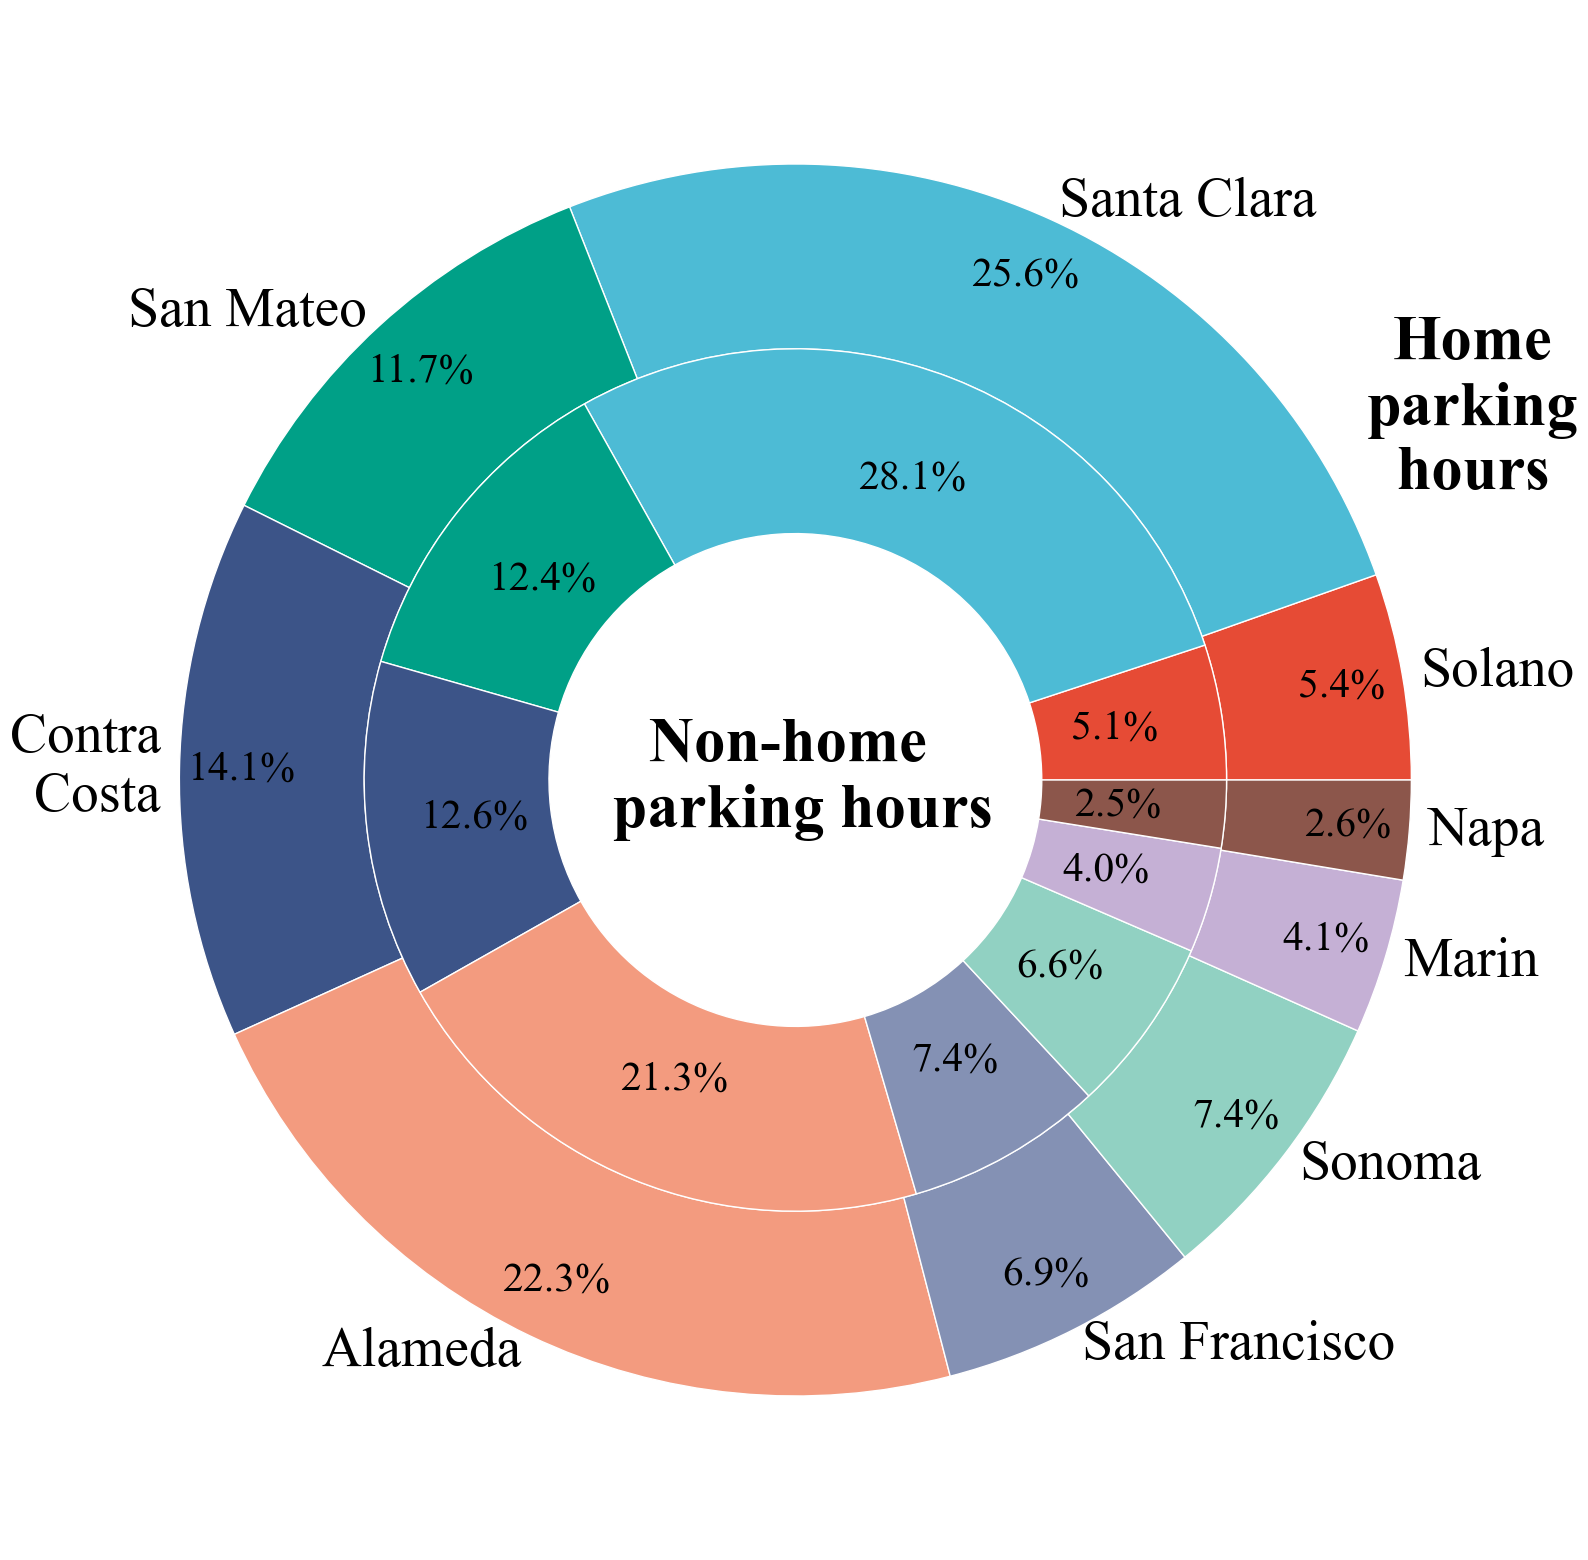

In [22]:
# 设置颜色列表
colors = [
    '#E64B35',  # 红色
    '#4DBBD5',  # 蓝色
    '#00A087',  # 绿色
    '#3C5488',  # 深蓝色
    '#F39B7F',  # 浅橙色
    '#8491B4',  # 灰蓝色
    '#91D1C2',   # 浅绿色
    "#c5b0d5", 
    "#8c564b"
]

# 设置图形
fig, ax = plt.subplots(figsize=(20, 20))

# 大圆环表示 home 数据的百分比
wedges, texts, autotexts = ax.pie(df['home_pct'], radius=1, labels=labelNames, colors=colors[:len(df)], labeldistance=1.03, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.9, autopct='%1.1f%%')

# 小圆环表示 nonhome 数据的百分比
wedges2, texts2, autotexts2 = ax.pie(df['nonhome_pct'], radius=0.7, colors=colors[:len(df)], wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.75, autopct='%1.1f%%')

# 设置百分比标签的字体大小
for autotext in autotexts + autotexts2:
    autotext.set_fontsize(30)

# 设置县名称标签的字体大小
for text in texts + texts2:
    text.set_fontsize(40)

# # 添加额外的标签表示内环和外环分别是 home 和 nonhome
plt.text(1.1, 0.6, 'Home\nparking\n hours ', ha='center', va='center', fontsize=45, fontfamily='Times New Roman', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none'))
plt.text(0, 0, 'Non-home \n parking hours', ha='center', va='center', fontsize=45, fontfamily='Times New Roman', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none'))


# 设置标题
# ax.set_title('Home and Nonhome Data by County', fontsize=15, fontfamily='Times New Roman')

# plt.savefig('figures/California/ParkingHours_bay.pdf', format='pdf')

# 显示图形
plt.show()